# A pathological example

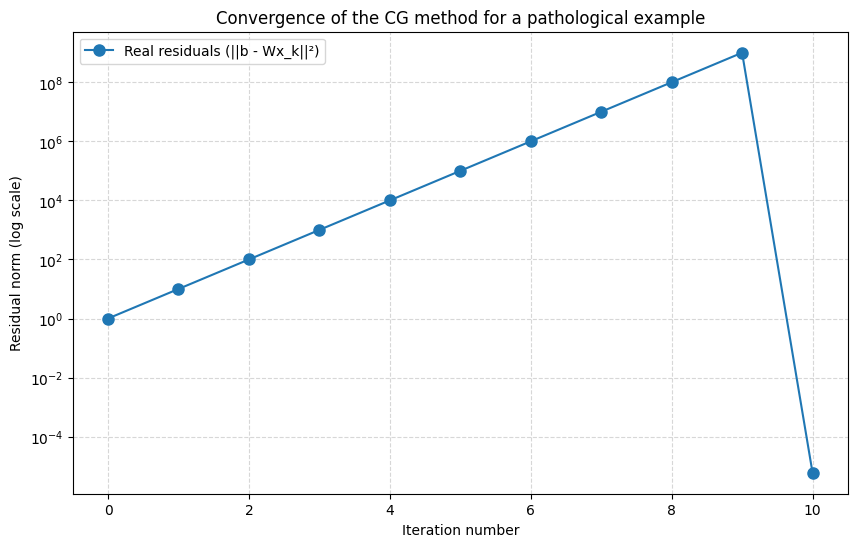

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

def build_W(n, t):
    main_diag = [t] + [1 + t] * (n - 2) + [1 + t]
    off_diag = [np.sqrt(t)] * (n - 1)
    return diags([main_diag, off_diag, off_diag], [0, 1, -1], shape=(n, n)).toarray()

def conjugate_gradient(W, b, max_iter=None):
    n = len(b)
    x = np.zeros(n)
    r = b - W @ x
    p = r.copy()
    rsold = r.dot(r)
    residuals = [rsold]
    if max_iter is None:
        max_iter = n
    for _ in range(max_iter):
        Ap = W @ p
        alpha = rsold / p.dot(Ap)
        x += alpha * p
        r -= alpha * Ap
        rsnew = r.dot(r)
        residuals.append(rsnew)
        if rsnew < 1e-15:
            break
        p = r + (rsnew / rsold) * p
        rsold = rsnew
    return x, residuals

# Parameters
t = 0.1
n = 10

# Building problem and solution
W = build_W(n, t)
b = np.zeros(n)
b[0] = 1
x, residuals = conjugate_gradient(W, b)


# Graph
plt.figure(figsize=(10, 6))
plt.semilogy(residuals, 'o-', label='Real residuals (||b - Wx_k||²)', markersize=8)
plt.xlabel('Iteration number')
plt.ylabel('Residual norm (log scale)')
plt.title('Convergence of the CG method for a pathological example')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()